# Analiza podatkov

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 10)
%matplotlib inline
IGRE = pd.read_csv('igre.csv')
zanri = pd.read_csv('zanri_iger.csv')
razvijalci = pd.read_csv('razvijalci_iger.csv')
zalozniki = pd.read_csv('zalozniki_iger.csv')


In [66]:
IGRE = IGRE.drop_duplicates()
IGRE

,ime,kljuc_igre,ocena,leto,platforma,maks_st_igralcev,daljsi_opis
0,Halo: Combat Evolved,1,4.2,2003,Windows,1.0,"In Halo's twenty-sixth century setting, the pl..."
1,Halo 2,6,4.4,2007,Windows,1.0,Halo 2 is the sequel to the highly successful ...
2,Army of Two,8,3.5,2008,Microsoft Xbox 360,4.0,"Focusing on cooperative strategies, Army of Tw..."
3,BioShock,10,4.5,2007,Windows,1.0,BioShock is a shooter unlike any you've ever p...
4,Dead Space (2008),11,4.4,2008,Windows,1.0,"You are Isaac Clarke, an engineer on the space..."
...,...,...,...,...,...,...,...
1995,Shin Megami Tensei: Persona 4,124791,5.0,2014,Sony Playstation 3,1.0,A rumor is going around school that by looking...
1996,The Long Reach,124822,2.5,2018,Microsoft Xbox One,1.0,The Long Reach is an adventure game filled wit...
1997,Them & Us,124847,4.3,2018,Windows,1.0,"Them & Us is a hardcore, survival horror game ..."
1998,Gun Gun Pixies,125249,5.0,2019,Windows,1.0,"In a unique spin on third-person shooter, it w..."


In [84]:
#število iger, ki je izšlo v posameznem letu
st_iger_po_letih = IGRE[IGRE['leto'] != 'No information available'].groupby('leto')[['ime']].count()
st_iger_po_letih = st_iger_po_letih.rename(columns={'ime': 'st_iger_v_letu'})
st_iger_po_letih

,st_iger_v_letu
leto,
1993,1
1994,23
1995,24
1996,44
1997,42
...,...
2018,24
2019,21
2020,1


Text(0.5, 1.0, 'Število iger v posameznem letu')

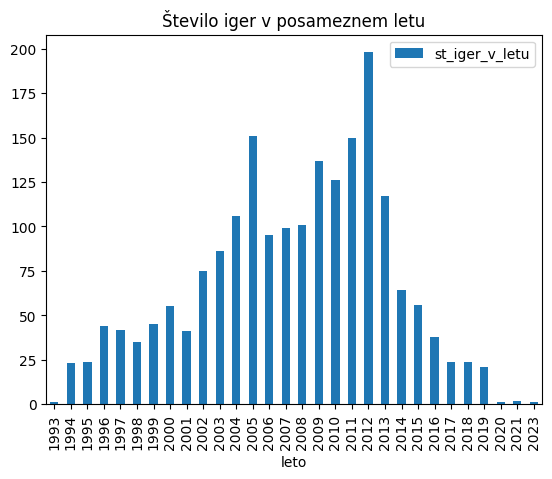

In [85]:
st_iger_po_letih.plot.bar()
plt.title('Število iger v posameznem letu')

Text(0.5, 1.0, 'Povprečna ocena po letih')

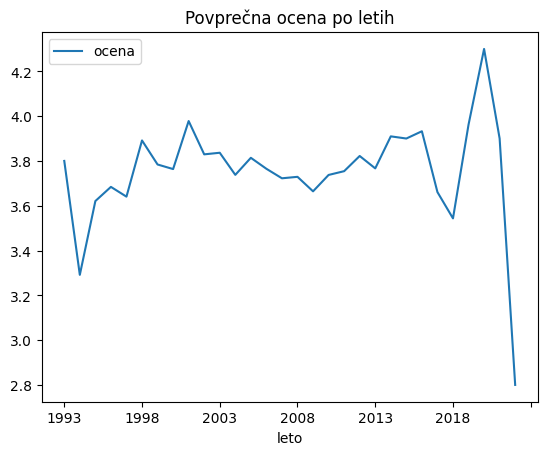

In [86]:
#Analiza kakovosti iger skozi leta
povprečja_po_letih = IGRE[IGRE['leto'] != 'No information available'].groupby('leto')[['ocena']].mean()
povprečja_po_letih.plot()
plt.title('Povprečna ocena po letih')
#opazimo, da je kakovost nekoliko padla okoli leta 1993. Vzrok za veliki padec po letu 2020 je lahko to da se tudi dejstvo da je manj glasov 
#na spletni strani za novejše igre, zato se slabe ocene hitro poznajo. Okoli leta 2012, ko je, kot vidimo zgornjem grafu, izhajalo največ iger 
# z ratingom M-mature, pa igre niso ble najkvalitetnejše. Vzrok za to bi lahko bila želja po kvantiteti pred kvaliteto.

In [70]:
#število iger na posamezni platformi
platforme = IGRE.groupby('platforma').count()
platforme = platforme[['ime']].rename(columns={'ime': 'st_iger'})
platforme

,st_iger
platforma,
3DO Interactive Multiplayer,12
Android,1
Apple Mac OS,3
Apple iOS,3
Atari Jaguar,4
...,...
Sony Playstation 4,42
Sony Playstation Vita,22
Super Nintendo Entertainment System,4


In [71]:
zanri = zanri.drop_duplicates()
igre_in_zanri = pd.merge(IGRE, zanri, on="kljuc_igre")
igre_in_zanri

,ime,kljuc_igre,ocena,leto,platforma,maks_st_igralcev,daljsi_opis,zanr
0,Halo: Combat Evolved,1,4.2,2003,Windows,1.0,"In Halo's twenty-sixth century setting, the pl...",Adventure
1,Halo: Combat Evolved,1,4.2,2003,Windows,1.0,"In Halo's twenty-sixth century setting, the pl...",Shooter
2,Halo 2,6,4.4,2007,Windows,1.0,Halo 2 is the sequel to the highly successful ...,Adventure
3,Halo 2,6,4.4,2007,Windows,1.0,Halo 2 is the sequel to the highly successful ...,Shooter
4,Army of Two,8,3.5,2008,Microsoft Xbox 360,4.0,"Focusing on cooperative strategies, Army of Tw...",Action
...,...,...,...,...,...,...,...,...
3582,The Long Reach,124822,2.5,2018,Microsoft Xbox One,1.0,The Long Reach is an adventure game filled wit...,Adventure
3583,Them & Us,124847,4.3,2018,Windows,1.0,"Them & Us is a hardcore, survival horror game ...",Action
3584,Them & Us,124847,4.3,2018,Windows,1.0,"Them & Us is a hardcore, survival horror game ...",Horror
3585,Gun Gun Pixies,125249,5.0,2019,Windows,1.0,"In a unique spin on third-person shooter, it w...",Shooter


In [72]:
popularni_zanri = igre_in_zanri.groupby('zanr')[['ime']].count().rename(columns={'ime':'st_iger'})
popularni_zanri = popularni_zanri.sort_values(by='st_iger', ascending=False)
popularni_zanri

,st_iger
zanr,
Shooter,885
Action,818
Adventure,513
Horror,308
Role-Playing,281
...,...
Construction and Management Simulation,3
Quiz,3
Party,2


Text(0.5, 1.0, 'Povprečna ocena žanra')

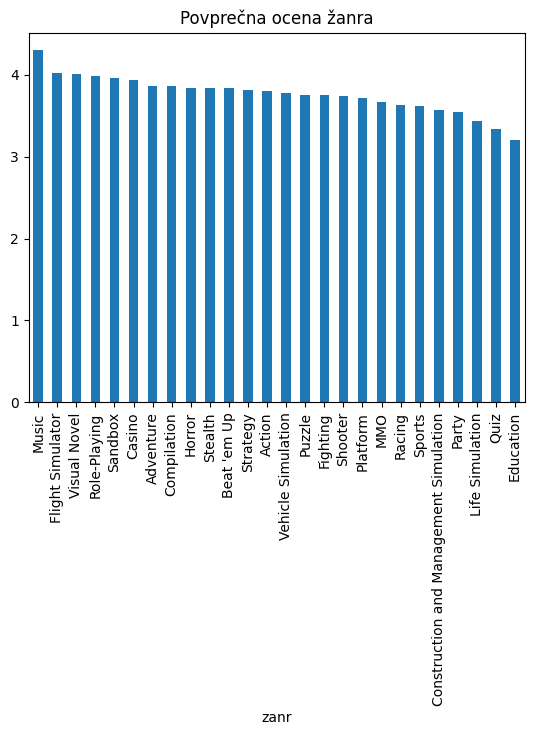

In [88]:
najbolje_ocenjeni_zanri = igre_in_zanri.groupby('zanr')['ocena'].mean().sort_values(ascending=False)
najbolje_ocenjeni_zanri.plot.bar() 
plt.title('Povprečna ocena žanra')

In [74]:
#ker so igre žanra 'shooter' najbolj popularne, poglejmo katere so to, katerega leta so izšle in na kateri platformi
shooterji = igre_in_zanri[igre_in_zanri['zanr'] == 'Shooter']
shooterji = shooterji[['ime', 'kljuc_igre', 'leto', 'platforma']]
shooterji

,ime,kljuc_igre,leto,platforma
1,Halo: Combat Evolved,1,2003,Windows
3,Halo 2,6,2007,Windows
5,Army of Two,8,2008,Microsoft Xbox 360
9,BioShock,10,2007,Windows
12,Dead Space (2008),11,2008,Windows
...,...,...,...,...
3542,Ugly Americans: Apocalypsegeddon,118169,2011,Sony Playstation 3
3543,Deadfall Adventures: Heart of Atlantis,118180,2014,Sony Playstation 3
3556,Gal*Gun 2,118989,2018,Windows
3579,Borderlands 3,124669,2019,Microsoft Xbox One


<Axes: xlabel='leto'>

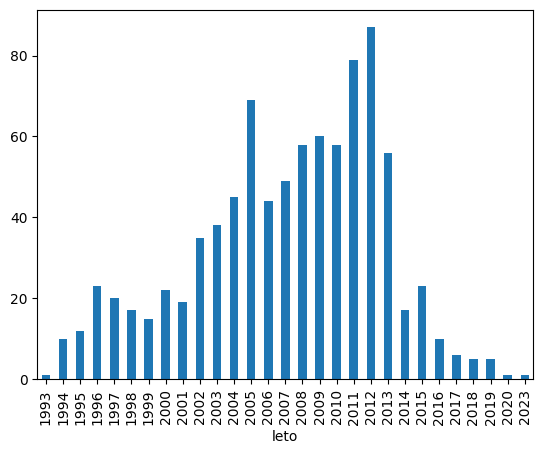

In [75]:
#grafični prikaz koliko shooter filmov je izšlo po letih
shooterji.groupby('leto')['ime'].count().plot.bar()

In [93]:
#katera platforma je izdala najvec shooterjev - oz katera je izdala najvecji delež shooterjev
shooterji_platform = shooterji.groupby('platforma')['ime'].count()
platforme['delez_shooterjev'] = (shooterji_platform/ platforme['st_iger']).round(2)    
platforme.sort_values(by='delez_shooterjev',ascending=False)
platforme

,st_iger,delez_shooterjev
platforma,,
3DO Interactive Multiplayer,12,0.42
Android,1,1.00
Apple Mac OS,3,0.33
Apple iOS,3,0.67
Atari Jaguar,4,0.50
...,...,...
Sony Playstation 4,42,0.40
Sony Playstation Vita,22,0.23
Super Nintendo Entertainment System,4,0.25


Text(0.5, 1.0, 'Delež shooterjev')

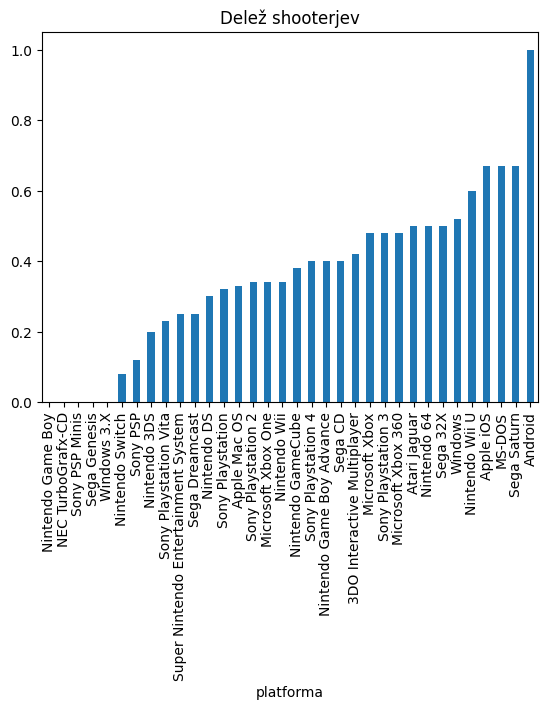

In [94]:
platforme[platforme['delez_shooterjev'].isna()] = 0
platforme['delez_shooterjev'].sort_values().plot.bar()
plt.title('Delež shooterjev')

In [77]:
#Pogostost kombinacij žanrov

zdruzi_zanre = igre_in_zanri.groupby('kljuc_igre')['zanr'].apply(lambda x: ', '.join(sorted(x.unique()))).reset_index()

zdruzi_zanre = pd.merge(zdruzi_zanre, igre_in_zanri[['kljuc_igre', 'ocena', 'ime']], on='kljuc_igre').drop_duplicates() #da se znebim identičnih vrstic saj sem zdaj to naredila v vsaki vrstici-torej za vsako igro večkrat
zdruzi_zanre
kolikokrat_se_pojavi_kombinacija = zdruzi_zanre.groupby('zanr').count()
kolikokrat_se_pojavi_kombinacija = kolikokrat_se_pojavi_kombinacija[['kljuc_igre']].rename(columns={'kljuc_igre': 'st_kombinacij'})
kolikokrat_se_pojavi_kombinacija.sort_values(by='st_kombinacij', ascending=False)


,st_kombinacij
zanr,
Shooter,416
Action,156
"Action, Adventure",105
"Action, Shooter",102
"Horror, Shooter",79
...,...
"Racing, Sports",1
"Puzzle, Shooter",1
"Sandbox, Shooter, Vehicle Simulation",1


In [78]:
razvijalci = razvijalci.drop_duplicates()
razvijalci

,kljuc_igre,kljuc_razvijalca,razvijalec
0,1,6661,Bungie
1,87,6661,Bungie
2,184,6661,Bungie
3,3778,6661,Bungie
5,5803,6661,Bungie
...,...,...,...
2193,8171,66657778,SCE Studio Santa Monica
2194,11938,66657778,SCE Studio Santa Monica
2195,12909,66657778,SCE Studio Santa Monica
2196,12169,66657778,SCE Studio Santa Monica


In [79]:
igre_in_razvijalci = pd.merge(IGRE, razvijalci, on='kljuc_igre')
igre_in_razvijalci

,ime,kljuc_igre,ocena,leto,platforma,maks_st_igralcev,daljsi_opis,kljuc_razvijalca,razvijalec
0,Halo: Combat Evolved,1,4.2,2003,Windows,1.0,"In Halo's twenty-sixth century setting, the pl...",6661,Bungie
1,Halo: Combat Evolved,1,4.2,2003,Windows,1.0,"In Halo's twenty-sixth century setting, the pl...",66646,Gearbox Software
2,Halo 2,6,4.4,2007,Windows,1.0,Halo 2 is the sequel to the highly successful ...,6661,Bungie
3,Army of Two,8,3.5,2008,Microsoft Xbox 360,4.0,"Focusing on cooperative strategies, Army of Tw...",6662948,Electronic Arts Montreal
4,BioShock,10,4.5,2007,Windows,1.0,BioShock is a shooter unlike any you've ever p...,6667168,2K Australia
...,...,...,...,...,...,...,...,...,...
2176,The Long Reach,124822,2.5,2018,Microsoft Xbox One,1.0,The Long Reach is an adventure game filled wit...,66614023,Painted Black Games
2177,Them & Us,124847,4.3,2018,Windows,1.0,"Them & Us is a hardcore, survival horror game ...",66627507,Tendogames
2178,Gun Gun Pixies,125249,5.0,2019,Windows,1.0,"In a unique spin on third-person shooter, it w...",6661576,Idea Factory
2179,Gun Gun Pixies,125249,5.0,2019,Windows,1.0,"In a unique spin on third-person shooter, it w...",6662699,Shade


In [80]:
#Poglejmo kako sta povezani ocena in št. iger ki jih naredi razvijalec. Ali lahko sklepamo mogoče če jih je manj so bolj kvalitetne?    
igre_in_ocene_razvijalca = igre_in_razvijalci.groupby('kljuc_razvijalca').agg(
    Razvijalec = ('razvijalec', 'first'),
    St_iger = ('ime', 'count'),
    Povprecna_ocena = ('ocena', 'mean')
).sort_values(by='St_iger', ascending=False)
igre_in_ocene_razvijalca

,Razvijalec,St_iger,Povprecna_ocena
kljuc_razvijalca,,,
66611,Capcom,76,3.967105
6668,Ubisoft Montreal,50,3.930000
66624,BioWare,27,4.177778
666340,Volition,27,3.744444
66646,Gearbox Software,27,3.848148
...,...,...,...
66645625,Midway Studios -- Chicago,1,3.500000
66643831,Trilobyte Games,1,3.500000
66617,Clover Studio,1,4.200000


Text(0.5, 1.0, 'Povezava med številom iger razvijalca in povprečno oceno')

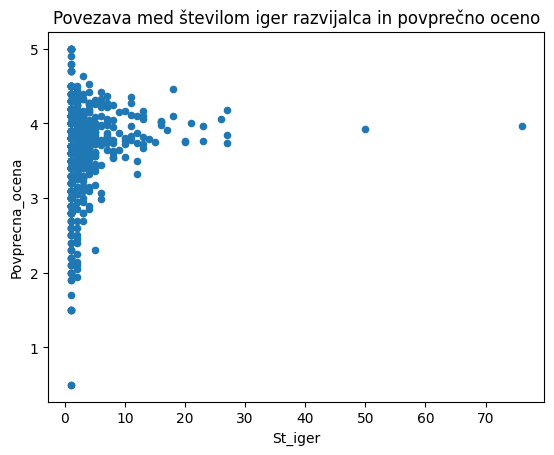

In [96]:
igre_in_ocene_razvijalca.plot.scatter(x= 'St_iger', y='Povprecna_ocena')
plt.title('Povezava med številom iger razvijalca in povprečno oceno')

In [98]:
zalozniki = zalozniki.drop_duplicates()
igre_in_zalozniki = pd.merge(IGRE, zalozniki, left_on='kljuc_igre', right_on = 'kljuc_igre', how='left') #saj v zaloznikih manjkajo nekateri filmi, za katere ni bilo podatkov
igre_in_zalozniki


,ime,kljuc_igre,ocena,leto,platforma,maks_st_igralcev,daljsi_opis,kljuc_zaloznika,zaloznik
0,Halo: Combat Evolved,1,4.2,2003,Windows,1.0,"In Halo's twenty-sixth century setting, the pl...",5551.0,Microsoft Game Studios
1,Halo 2,6,4.4,2007,Windows,1.0,Halo 2 is the sequel to the highly successful ...,5556.0,Microsoft
2,Army of Two,8,3.5,2008,Microsoft Xbox 360,4.0,"Focusing on cooperative strategies, Army of Tw...",5552.0,Electronic Arts
3,BioShock,10,4.5,2007,Windows,1.0,BioShock is a shooter unlike any you've ever p...,5559.0,2K Games
4,Dead Space (2008),11,4.4,2008,Windows,1.0,"You are Isaac Clarke, an engineer on the space...",5552.0,Electronic Arts
...,...,...,...,...,...,...,...,...,...
2215,Shin Megami Tensei: Persona 4,124791,5.0,2014,Sony Playstation 3,1.0,A rumor is going around school that by looking...,5555759.0,Sony Interactive Entertainment
2216,The Long Reach,124822,2.5,2018,Microsoft Xbox One,1.0,The Long Reach is an adventure game filled wit...,5552476.0,Merge Games
2217,Them & Us,124847,4.3,2018,Windows,1.0,"Them & Us is a hardcore, survival horror game ...",55513769.0,Tendogames
2218,Gun Gun Pixies,125249,5.0,2019,Windows,1.0,"In a unique spin on third-person shooter, it w...",5553291.0,PQube


In [100]:
#Poglejmo kako sta povezani ocena in št. iger ki jih izda založnik. Ali lahko sklepamo mogoče, da bolj popularni založniki izdajajo boljše igre?  
igre_in_ocene_zaloznika = igre_in_zalozniki.groupby('kljuc_zaloznika').agg(
    Zaloznik = ('zaloznik', 'first'),
    St_iger = ('ime', 'count'),
    Povprecna_ocena = ('ocena', 'mean')
).sort_values(by='St_iger', ascending=False)
igre_in_ocene_zaloznika

,Zaloznik,St_iger,Povprecna_ocena
kljuc_zaloznika,,,
5552.0,Electronic Arts,139,3.952555
55510.0,Capcom,121,3.916529
5558.0,Ubisoft,119,3.796581
55532.0,Activision,87,3.838372
55523.0,Konami,69,3.915942
...,...,...,...
55526141.0,Trilobyte Games,1,3.500000
55526725.0,Alawar,1,3.200000
55531704.0,Sony Computer Entertainment Asia,1,4.400000


Text(0.5, 1.0, 'Povezava med številom iger založnika in povprečno oceno')

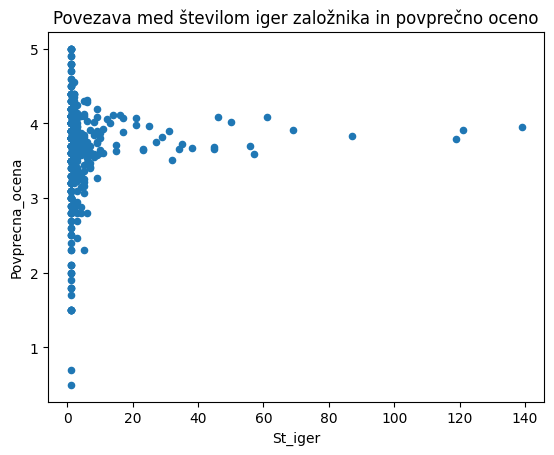

In [102]:
igre_in_ocene_zaloznika.plot.scatter(x= 'St_iger', y='Povprecna_ocena')
plt.title('Povezava med številom iger založnika in povprečno oceno')

In [107]:
#poglejmo koliko založnikov in razvijalcev je pri posamezni igri
manjsi_igre_in_razvijalci = igre_in_razvijalci[['razvijalec','ime','kljuc_igre']]
manjsi_igre_in_zalozniki = igre_in_zalozniki[['zaloznik', 'ime','kljuc_igre']]
sodelovanje = pd.merge(manjsi_igre_in_razvijalci, manjsi_igre_in_zalozniki, on='kljuc_igre', how= 'outer')

sodelovanje[['razvijalec', 'zaloznik']] = sodelovanje[['razvijalec','zaloznik']].fillna(' ')

st_razvijalcev_in_zaloznikov_na_igro = sodelovanje.groupby('kljuc_igre').agg(
    st_razvijalcev=('razvijalec', 'nunique'),
    st_zaloznikov=('zaloznik', 'nunique')
).reset_index()
st_razvijalcev_in_zaloznikov_na_igro


,kljuc_igre,st_razvijalcev,st_zaloznikov
0,1,2,1
1,6,1,1
2,8,1,1
3,10,2,1
4,11,1,1
...,...,...,...
1978,124791,1,1
1979,124822,1,1
1980,124847,1,1
1981,125249,2,1


In [109]:
#dodajmo še ocene
zalozniki_in_razvijalci = pd.merge(st_razvijalcev_in_zaloznikov_na_igro, IGRE[['kljuc_igre', 'ocena']], on='kljuc_igre', how='left')
zalozniki_in_razvijalci

,kljuc_igre,st_razvijalcev,st_zaloznikov,ocena
0,1,2,1,4.2
1,6,1,1,4.4
2,8,1,1,3.5
3,10,2,1,4.5
4,11,1,1,4.4
...,...,...,...,...
1978,124791,1,1,5.0
1979,124822,1,1,2.5
1980,124847,1,1,4.3
1981,125249,2,1,5.0


Text(0.5, 1.0, 'Povezava med številom razvijalcev in oceno igre')

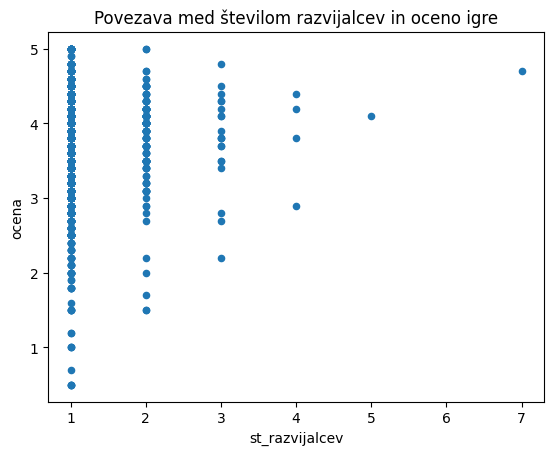

In [110]:
zalozniki_in_razvijalci.plot.scatter(x= 'st_razvijalcev', y='ocena')
plt.title('Povezava med številom razvijalcev in oceno igre')

Text(0.5, 1.0, 'Povezava med številom zaloznikov in oceno igre')

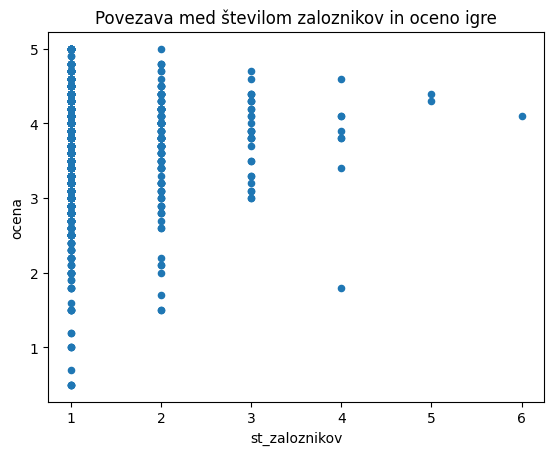

In [111]:
zalozniki_in_razvijalci.plot.scatter(x= 'st_zaloznikov', y='ocena')
plt.title('Povezava med številom zaloznikov in oceno igre')
